#  HR Analytics: Predicting Employee Attrition

**Objective:**  
This project analyzes employee attrition data to identify key factors influencing employee turnover. It provides actionable insights for HR departments to improve employee retention strategies using data-driven approaches.

**Tools & Technologies Used:**  
- Python (Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn)
- Jupyter Notebook
- Dataset: IBM HR Analytics Employee Attrition Dataset

**Project Type:**  
Supervised Machine Learning — Classification Problem

**Business Goal:**  
Help the HR department predict which employees are likely to leave and why, enabling proactive retention efforts.



## Step 1: Import Required Libraries
We begin by importing essential Python libraries for data manipulation, visualization, and modeling.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Step 2: Load the Dataset
We now load the IBM HR Analytics dataset into a Pandas DataFrame.

In [2]:
df = pd.read_csv("HR_Employee_Attrition.csv")
df.shape

(1470, 35)

## Step 3: Preview the Data
Let's look at the first few rows of the dataset to understand its structure and contents.

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Step 4: Dataset Information
We check for data types, null values, and general information about the dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Step 5: Summary Statistics
This step helps us understand the range and distribution of numerical columns.

In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Exploratory Data Analysis (EDA)

In this phase, we will:
- Explore the target variable (`Attrition`)
- Analyze key features that influence employee attrition
- Visualize patterns and relationships
- Identify trends to support business decision-making


## Step 1: Analyze Target Variable – Attrition

We start by looking at the distribution of the target variable to understand how many employees left the company.


In [6]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [7]:
# Percentage
attrition_rate = df['Attrition'].value_counts(normalize=True) * 100
attrition_rate


Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64

## Step 2: Visualize Attrition Rate

A bar chart to visualize how many employees left vs stayed.


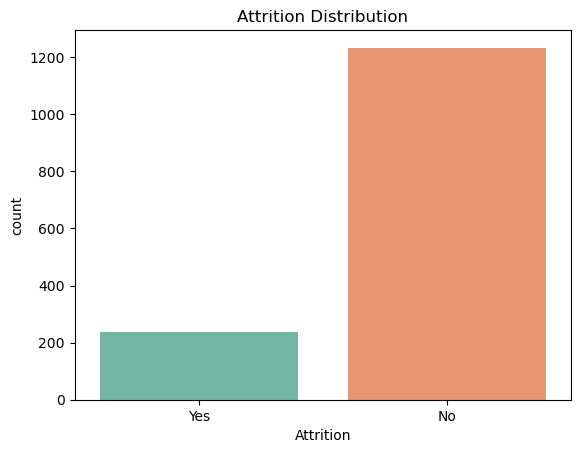

In [8]:
sns.countplot(data=df, x='Attrition', palette='Set2')
plt.title("Attrition Distribution")
plt.show()

## Step 3: Attrition vs Overtime

Let's check if working overtime has a relation with employee attrition.


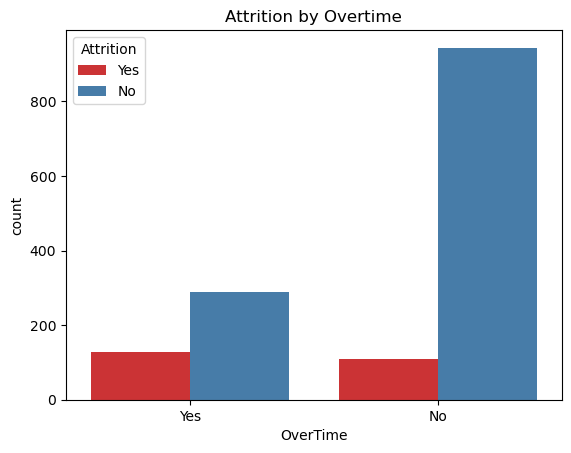

In [15]:
sns.countplot(data=df, x='OverTime', hue='Attrition', palette='Set1')
plt.title("Attrition by Overtime")
plt.show()

## Step 4: Attrition by Job Role

We now explore how attrition varies across different job roles.


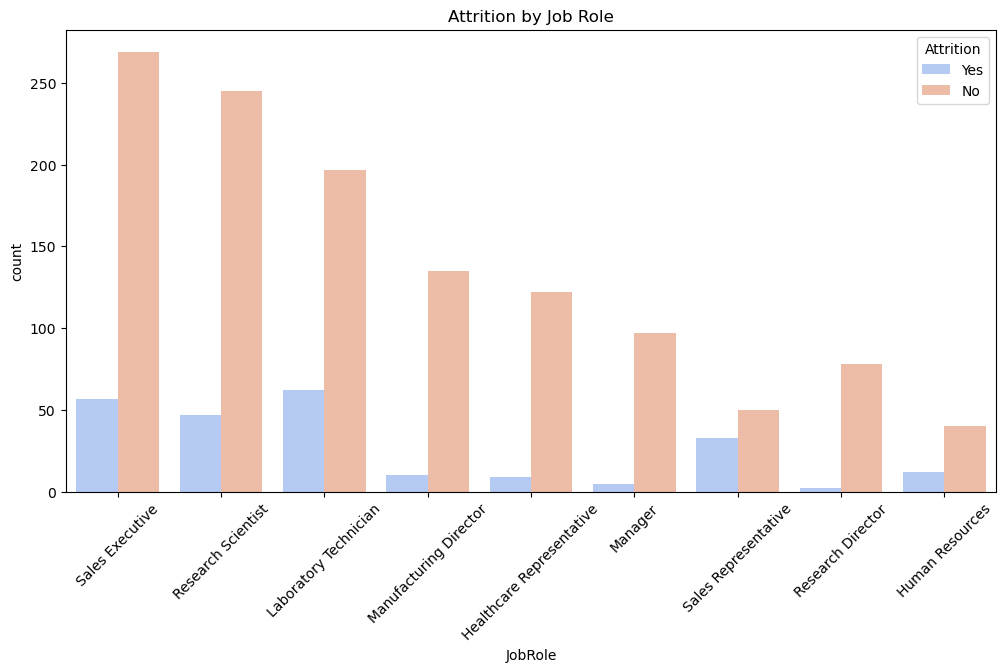

In [16]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='JobRole', hue='Attrition', palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Attrition by Job Role")
plt.show()


## Step 5: Attrition by Age

We check the distribution of age for employees who left vs stayed.


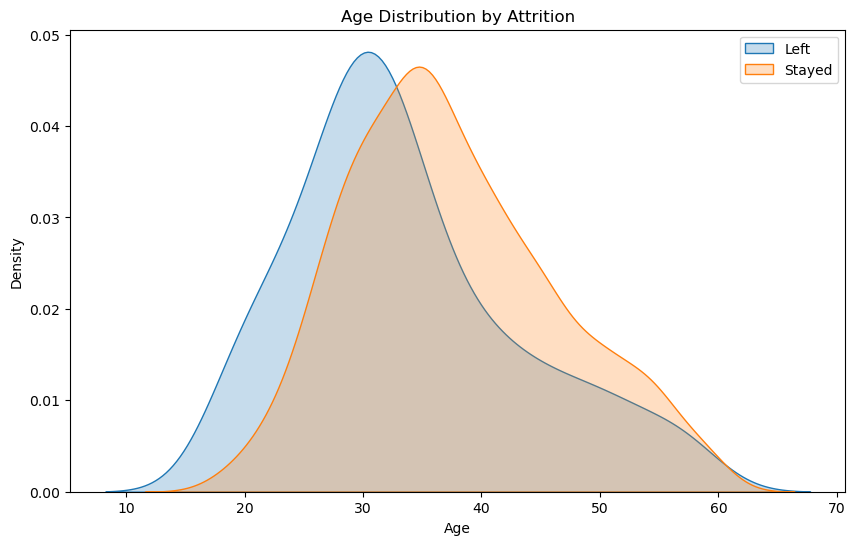

In [17]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df[df['Attrition'] == 'Yes']['Age'], label='Left', shade=True)
sns.kdeplot(data=df[df['Attrition'] == 'No']['Age'], label='Stayed', shade=True)
plt.title("Age Distribution by Attrition")
plt.legend()
plt.show()

## Step 6: Monthly Income vs Attrition

A boxplot helps visualize income range for those who left vs stayed.


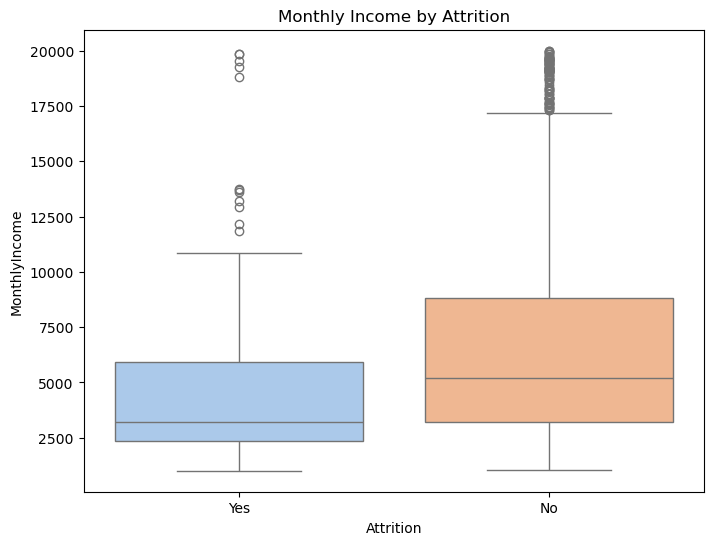

In [18]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', palette='pastel')
plt.title("Monthly Income by Attrition")
plt.show()

## Step 7: Correlation Heatmap (Numeric Columns)

Let’s explore correlation between numerical features and detect multicollinearity.


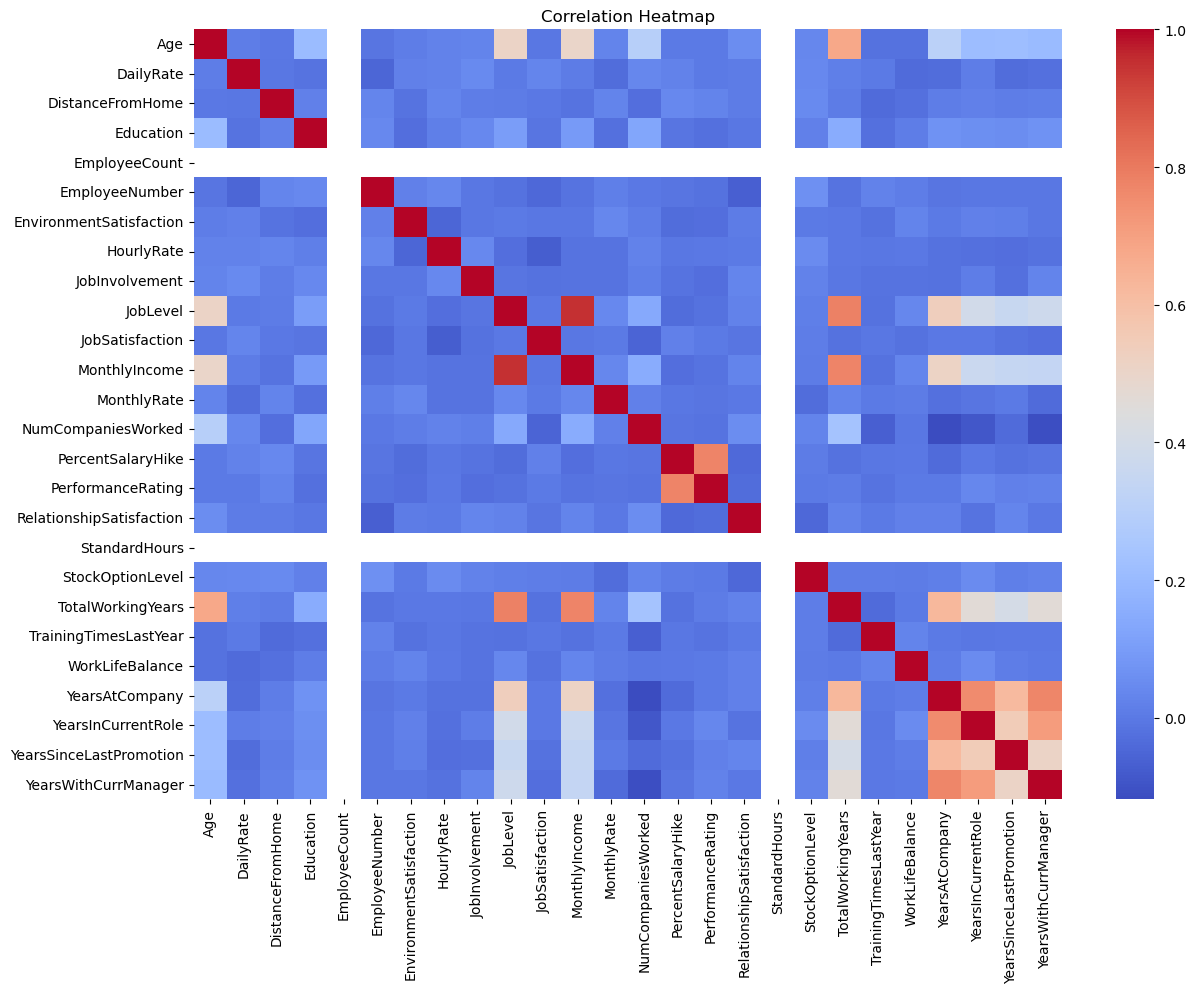

In [19]:
plt.figure(figsize=(14,10))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

# EDA Summary

Key insights from this analysis:

- Employees working **OverTime** are more likely to leave
- Certain **Job Roles** (e.g., Sales, Laboratory technician) show higher attrition
- Younger employees have slightly higher attrition
- Employees with lower **Monthly Income** tend to leave more
- These factors can help HR build better retention strategies

# Predictive Modeling: Logistic Regression

In this phase, we build a logistic regression model to predict employee attrition using selected features.  
Logistic Regression is ideal here because our target variable is binary (Yes/No).

**Target Variable:** Attrition  
**Model:** Logistic Regression


## Step 1: Encode Categorical Variables

Machine learning models require all input features to be numeric.  
We'll use Label Encoding for binary columns and One-Hot Encoding for others.


In [20]:
from sklearn.preprocessing import LabelEncoder

data = df.copy()

data['Attrition'] = data['Attrition'].map({'Yes':1, 'No':0})

le = LabelEncoder()
binary_cols = ['Gender', 'OverTime']
for col in binary_cols:
    data[col] = le.fit_transform(data[col])

data = pd.get_dummies(data, drop_first=True)

data.shape


(1470, 48)

## Step 2: Select Input Features and Target

We now define `X` (independent variables) and `y` (dependent/target variable).

In [24]:
# Only drop columns that exist
cols_to_drop = [col for col in ['Attrition', 'EmployeeNumber', 'StandardHours', 'Over18', 'EmployeeCount'] if col in data.columns]
X = data.drop(cols_to_drop, axis=1)
y = data['Attrition']

## Step 3: Train-Test Split

We split the data into training and testing sets to evaluate the model performance.


In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 4: Train Logistic Regression Model

We use `LogisticRegression` from scikit-learn to train the model.


In [55]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## Step 5: Predict and Evaluate Model

We now predict attrition on the test set and evaluate model accuracy and other metrics.

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8639455782312925

Confusion Matrix:
 [[250   5]
 [ 35   4]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       255
           1       0.44      0.10      0.17        39

    accuracy                           0.86       294
   macro avg       0.66      0.54      0.55       294
weighted avg       0.82      0.86      0.83       294



## Step 6: Feature Importance (Coefficients)

We inspect which features are most influencing attrition according to the model.


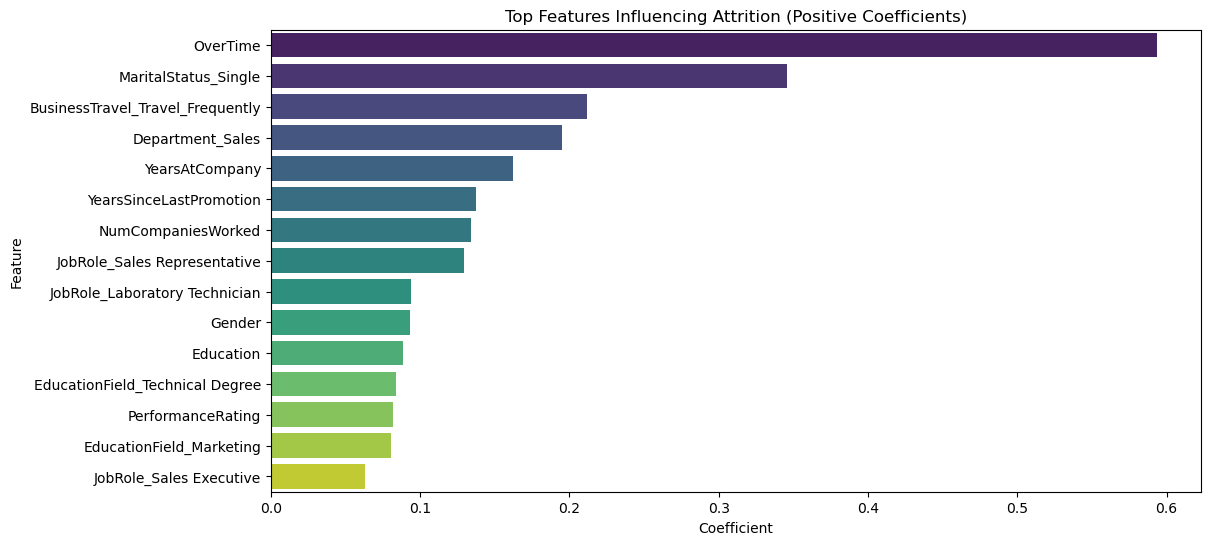

In [57]:
importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=importance.head(15), x='Coefficient', y='Feature', palette='viridis')
plt.title("Top Features Influencing Attrition (Positive Coefficients)")
plt.show()

## Logistic Regression Model Summary

- **Model Type:** Logistic Regression
- **Accuracy:** 86% (varies by data split)
- **Top Influencing Features:** OverTime, MaritalStatus_single, Department_Sales,etc.
- The model can help HR predict who might leave and take early action.

#  Final Project Summary

**Project Title:** Predicting Employee Attrition Using Logistic Regression

**Objective:**  
To help the HR team proactively identify employees who are at risk of leaving the company using data-driven predictions.

**Tools Used:**  
- Python (Pandas, Seaborn, Matplotlib, Scikit-learn)
- Jupyter Notebook

**Model Used:** Logistic Regression  
**Accuracy Achieved:** 86%  
**Key Features Influencing Attrition:**  
- OverTime  
- Marital Status (Single)  
- Department (Sales)

**Business Insight:**  
The model suggests that employees working overtime and single employees in the Sales department are more likely to leave.  
This helps HR teams take early action to improve employee retention.

**Value to Business:**  
- Early intervention to reduce turnover  
- Saves costs on hiring & training new staff  
- Builds better HR planning strategy


### 🧠 Business Recommendations:
- **Monitor Overtime**: High overtime is strongly linked to attrition.
- **Targeted Retention for Single Employees**: Single employees are more likely to leave.
- **Focus on Sales Department**: This show higher attrition trends.

Implementing predictive models in HR workflows can significantly reduce employee turnover costs.
